In [1]:
import os
from pathlib import Path
import shutil
from distutils.dir_util import copy_tree

import pandas as pd
import json
import time
import datetime

from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import scipy.stats
import itertools

# https://github.com/qwirky-yuzu/COCO-to-YOLO/blob/main/coco_to_yolo.py
# https://github.com/pylabel-project/samples/blob/main/coco2yolov5.ipynb
try:
    import pylabel
except:
    !pip install pylabel
finally:
    from pylabel import importer

import matplotlib.patches as patches
import matplotlib
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 22})
style_label = 'fivethirtyeight' #plt.style.available 

In [3]:
import labelutilits as utl

In [4]:
try:
    import dsatools 
except:
    !pip install dsatools
finally:
    import dsatools.utilits as ut

In [5]:
path = os.getcwd() 
print(utl.list_dirs(path))
anno_path = utl.get_anno_path(path,'train')
anno_path

['labelutilits', 'part1', 'part2', 'part3', 'part4', 'part5', 'part6', 'part7', 'part8', 'part9', 'train']


'D:\\ASBEST!\\ALLVEINS\\train\\annotation.json'

In [6]:
anno = utl.Annotation(anno_path).reset_annotation().print_info().\
        set_cat_names(new_names = ['stones', 'asbest']).\
        filter_cat(cat_ids=[2]).\
        replace_image_dir().reset_annotation().\
        save_anno('veins_anno.json',replace_path=True).print_info()


{'anno_fname': 'annotation.json',
 'anno_number': 4129,
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\annotation.json',
 'cat_ids': [1, 2],
 'class_names': ['asbest', 'stone'],
 'dataset_name': 'train',
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'height': [2048],
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'length': 231,
 'supercategory': ['', ''],
 'width': [2592]}
{'anno_fname': 'veins_anno.json',
 'anno_number': 3621,
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\veins_anno.json',
 'cat_ids': [1],
 'class_names': ['asbest'],
 'dataset_name': 'train',
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'height': [2048],
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'length': 185,
 'supercategory': [''],
 'width': [2592]}


In [7]:
anno.anno_path

'D:\\ASBEST!\\ALLVEINS\\train\\veins_anno.json'

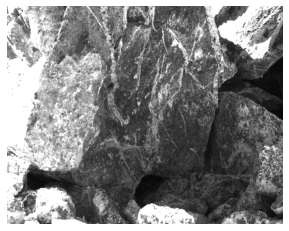

In [8]:
img = anno.get_image(image_id = 1)
plt.imshow(img, 'gray'); plt.axis('off'); plt.show();

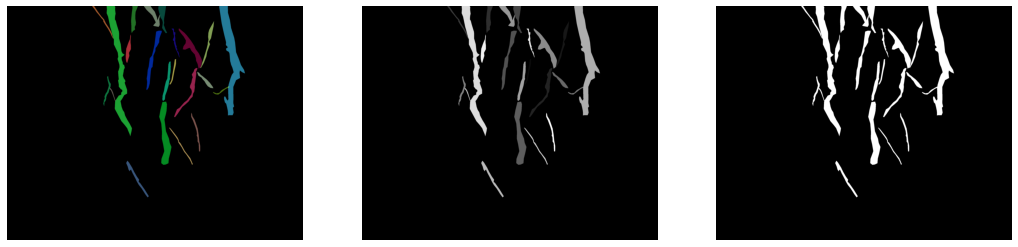

In [13]:
fig, axs = plt.subplots(1,3, figsize = (18,9))
mask = anno.get_masks(image_id = 1, mode='3d array')
axs[0].imshow(mask); axs[0].axis('off'); 
mask = anno.get_masks(image_id = 1, mode='2d array')
axs[1].imshow(mask,'gray'); axs[1].axis('off');
mask = anno.get_masks(image_id = 1, mode='semseg')
axs[2].imshow(mask,'gray'); axs[2].axis('off');
plt.show();


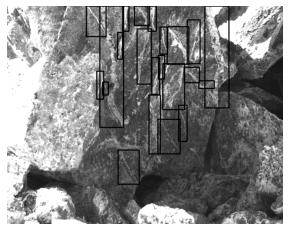

In [10]:
imgb = anno.get_image_with_bbox(image_id = 1)
plt.imshow(imgb, 'gray'); plt.axis('off'); plt.show();

In [8]:
# class Annotation(utl.Annotation):
#     def __init__(self, anno_path, image_dir_path=None):
#         super().__init__(anno_path, image_dir_path)
      
  

(-0.5, 2591.5, 2047.5, -0.5)

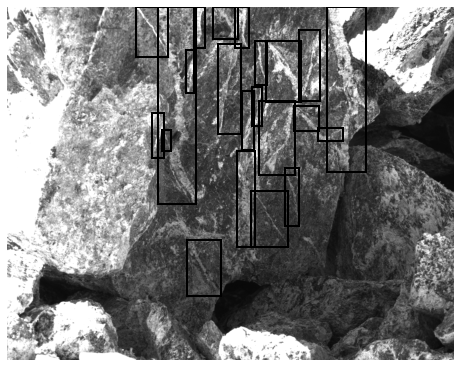

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

for box in bboxes:
    height = box[3] #- box[1]
    width  = box[2] #- box[0]

    lower_left_corner = (box[0], box[1] )

    bb = patches.Rectangle(lower_left_corner, width ,height, linewidth=2, edgecolor="black", facecolor="none")
    ax.add_patch(bb)
#         ax.text(box[0],box[1], str(int(score*100)/100) , fontsize = 11, fontweight = 'black', color = 'white'  )
ax.imshow(img, 'gray')
ax.axis('off')
#     axs[0,1].set_title('Object Detection')

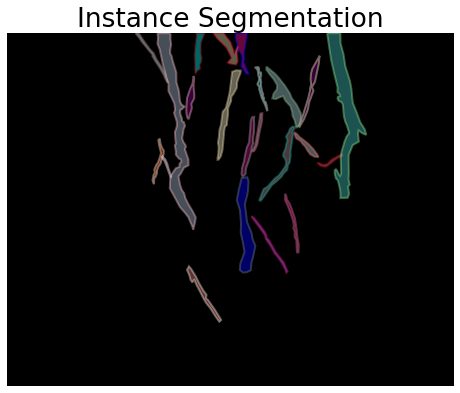

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

# INSTANT SEGMENTATION
colors = list(matplotlib.colors.cnames.keys())
for ann in anno.get_segmentations(image_id = 1):
    edgecolor = np.random.choice(colors, 1)[0]
    facecolor = np.random.choice(colors, 1)[0]
    mask = np.asarray(ann).reshape(-1,2)
    bb = patches.Polygon(mask, linewidth=2, edgecolor=edgecolor, facecolor=facecolor,alpha=0.4)
    ax.add_patch(bb)
ax.imshow(img*0, cmap='gray')
ax.axis('off')
ax.set_title('Instance Segmentation')  
plt.show()

In [14]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.text(0.0,0.0,"Test", fontsize=45)
ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')

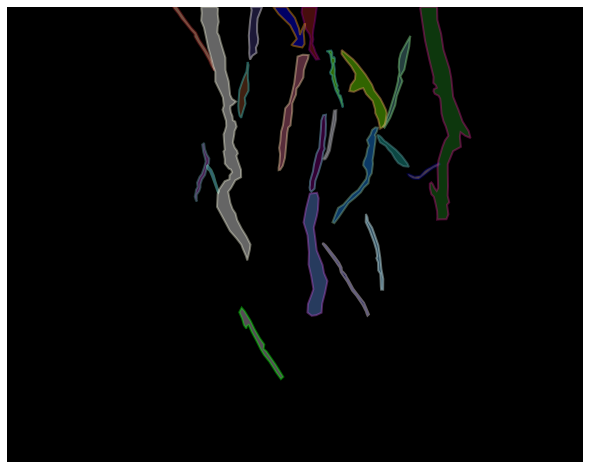

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

# INSTANT SEGMENTATION
colors = list(matplotlib.colors.cnames.keys())
for ann in anno.get_segmentations(image_id = 1):
    edgecolor = np.random.choice(colors, 1)[0]
    facecolor = np.random.choice(colors, 1)[0]
    mask = np.asarray(ann).reshape(-1,2)
    bb = patches.Polygon(mask, linewidth=2, edgecolor=edgecolor, facecolor=facecolor,alpha=0.4)
    ax.add_patch(bb)
ax.imshow(img*0, cmap='gray')
ax.axis('off')
fig.tight_layout(pad=0)
# To remove the huge white borders
ax.margins(0)
fig.canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

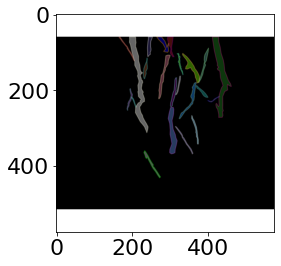

In [16]:
plt.imshow(image_from_plot)

In [18]:
anno.info()

{'cat_ids': [1],
 'class_names': ['asbest'],
 'supercategory': [''],
 'width': [2592],
 'height': [2048],
 'length': 185,
 'anno_number': 3621,
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'dataset_name': 'train',
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\veins_anno.json',
 'anno_fname': 'veins_anno.json'}

In [20]:
from pycocotools import mask as cocoutils

def get_masks(image_anno):
    h = image_anno['height'] 
    w = image_anno['width' ]
    mask_anns = image_anno['annotations']
    mask = np.zeros((h,w, len(mask_anns)))
    for i,ann in enumerate(mask_anns):
        mask[:,:,i] = _ann2mask(ann,h,w)
    return mask

def _ann2mask(ann, h,w):
    segm = ann['segmentation']
    rles = cocoutils.frPyObjects(segm, h, w)
    rle  = cocoutils.merge(rles)
    instant_mask = cocoutils.decode(rle)  
    return instant_mask

def get_bboxes(image_anno):
    bboxes = np.zeros((len(image_anno['annotations']),4),dtype=int)#x0,y0,w,h

    for i,ann in enumerate(image_anno['annotations']):
        bboxes[i] = ann['bbox']
    bboxes[:,2] = bboxes[:,0]+bboxes[:,2] #x-max
    bboxes[:,3] = bboxes[:,1]+bboxes[:,3] #y-max
    return bboxes 